In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# Download NLTK stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/krishan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/krishan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Randomly selected 2500 data points from the training dataset (“Train_rev1.csv”) for ease of analysis and split the 2500 data points into training (80%) and test (20%) sets.

In [2]:
# def split_data():
#     # Load the data
#     data = pd.read_csv('data/Train_rev1.csv')
#     # Randomly select 2500 data points
#     data = data.sample(n=2500)
#     # Split the data
#     train, test = train_test_split(data, test_size=0.2)
#     return train, test

# train, test = split_data()

# print(train.shape)
# print(test.shape)

In [3]:
# #reset index
# train = train.reset_index(drop=True)
# test = test.reset_index(drop=True)

# train.head()

In [4]:
# #target column = high if salary >= 75% percentile otherwise low
# salary_75 = train['SalaryNormalized'].quantile(0.75)
# print('75th percentile salary',salary_75)

# train['target'] = np.where(train['SalaryNormalized'] >= salary_75, 'high', 'low')
# test['target'] = np.where(test['SalaryNormalized'] >= salary_75, 'high', 'low')

In [5]:
# train = train[['FullDescription', 'target']]
# test = test[['FullDescription', 'target']]

# train.to_csv('train.csv', index=False)
# test.to_csv('test.csv', index=False)

# train.shape, test.shape

# Reading the Train and Test Data of 2000+500 rows

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((2000, 2), (500, 2))

In [7]:
train.head()

,FullDescription,target
0,If you are looking for a successful career in ...,low
1,Our top Sales Executives earn in excess of ***...,high
2,National Account Manager Yorkshire ****k ****...,high
3,An immediate opportunity has arisen for an exp...,low
4,This is a newly created role in a growing soft...,high


In [8]:
#Target Distribution in Train Test
train['target'].value_counts(normalize=True)

target
low     0.7365
high    0.2635
Name: proportion, dtype: float64

## Data Preprocessing of text column

- Removing non-alphabets
- Converting to lower case
- Removing stop words
- Lemmatization


In [9]:
# Preprocessing function to clean text data
def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

# lametize the words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

# Preprocess the text data
train['FullDescription'] = train['FullDescription'].apply(clean_text).apply(lemmatize_words)
test['FullDescription'] = test['FullDescription'].apply(clean_text).apply(lemmatize_words)


train.head()


,FullDescription,target
0,looking successful career insurance hic could ...,low
1,top sale executive earn excess per annum curre...,high
2,national account manager yorkshire k k car ben...,high
3,immediate opportunity arisen experienced pr ex...,low
4,newly created role growing software developmen...,high


## Binary Vectorizer

Using binary vectorizer to convert the text data into binary format for the Naive Bayes model.

In [10]:
# Create a binary vectorizer
binary_vectorizer = CountVectorizer(binary=True)
# Fit the vectorizer to the training data
X_train_binary = binary_vectorizer.fit_transform(train['FullDescription'])
# Transform the test data
X_test_binary = binary_vectorizer.transform(test['FullDescription'])

print('X_train_binary.shape, X_test_binary.shape:\n\n',X_train_binary.shape, X_test_binary.shape)

# Convert arrays to dense format.
if hasattr(X_train_binary, 'toarray'):
    X_train_binary_dense = X_train_binary.toarray()
else:
    X_train_binary_dense = X_train_binary

if hasattr(X_test_binary, 'toarray'):
    X_test_binary_dense = X_test_binary.toarray()
else:
    X_test_binary_dense = X_test_binary

# Now, create pandas DataFrames with column names from the vectorizer.
X_train_binary_df = pd.DataFrame(X_train_binary_dense, columns=binary_vectorizer.get_feature_names_out())
X_test_binary_df = pd.DataFrame(X_test_binary_dense, columns=binary_vectorizer.get_feature_names_out())

# Display the first few rows of X_train_binary_df to verify.
X_train_binary_df.head()

X_train_binary.shape, X_test_binary.shape:

 (2000, 14077) (500, 14077)


,aa,aaappointments,aacsb,aand,aar,aaron,aarosettehighlands,aat,ab,abbas,...,zigbee,zinc,zipped,zk,zm,zn,zoe,zone,zu,zxtm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Bernoulli Naïve Bayes to train the model
Using this since the predictor variables are binary

In [15]:
# Train a Naive Bayes classifier
model = BernoulliNB()

# Fit the model to the training data
model.fit(X_train_binary, train['target'])

# Predict the target
train['predicted'] = model.predict(X_train_binary)
test['predicted'] = model.predict(X_test_binary)

# Accuracy of the model

In [16]:
# Calculate the accuracy
test_accuracy = accuracy_score(test['target'], test['predicted'])

formatted_accuracy = "{:.2f}%".format(test_accuracy * 100)
print('Test accuracy:', formatted_accuracy)


Test accuracy: 79.80%


# Confusion Matrix

Confusion Matrix:

[[ 48  79]
 [ 22 351]]


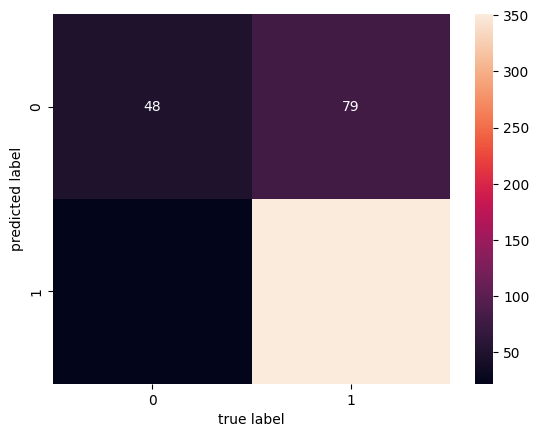

              precision    recall  f1-score   support

        high       0.69      0.38      0.49       127
         low       0.82      0.94      0.87       373

    accuracy                           0.80       500
   macro avg       0.75      0.66      0.68       500
weighted avg       0.78      0.80      0.78       500



In [13]:
# Create confusion matrix
mat = confusion_matrix(test["target"], test["predicted"])

# Print confusion matrix
print("Confusion Matrix:\n")
print(mat)

sns.heatmap(mat, annot=True, fmt='g')
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

# report
print(classification_report(test["target"], test["predicted"]))

# Top 10 words that are most indicative of 
### - high salary
### - low salary



Top 10 features for high salary:
                  high       low      diff
chef         -3.425212 -6.270988  2.845776
supervisory  -3.712894 -6.270988  2.558094
quote        -3.862426 -6.270988  2.408562
caring       -3.895216 -6.270988  2.375773
contributory -3.964209 -6.270988  2.306780
saturday     -4.000576 -6.270988  2.270412
operative    -4.038317 -6.270988  2.232672
uniform      -4.077537 -6.270988  2.193451
guest        -4.077537 -6.270988  2.193451
answering    -4.118359 -6.270988  2.152629


Top 10 features for low salary:
                   high       low      diff
architecting  -7.296413 -4.661551 -2.634863
togaf         -7.296413 -4.661551 -2.634863
presales      -6.197801 -3.437775 -2.760026
semiconductor -7.296413 -4.479229 -2.817184
cissp         -7.296413 -4.479229 -2.817184
prison        -7.296413 -4.479229 -2.817184
ops           -7.296413 -4.479229 -2.817184
roadmaps      -7.296413 -4.325078 -2.971335
gaap          -7.296413 -4.325078 -2.971335
bidding       -7.2

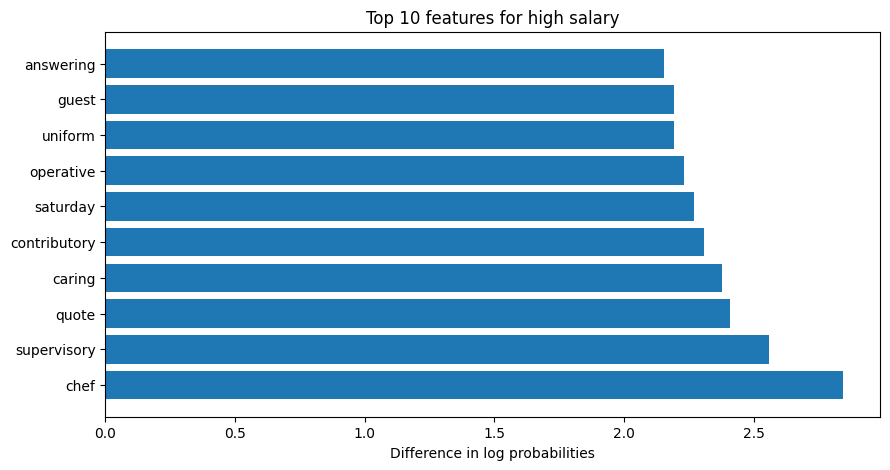

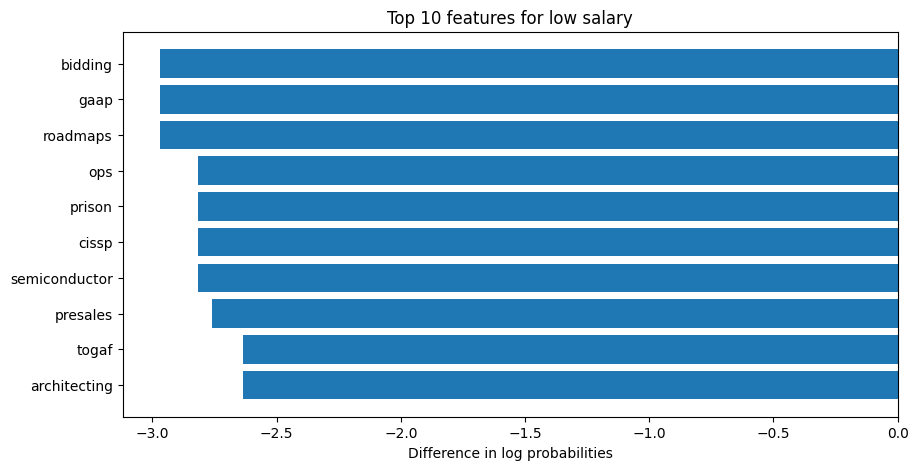

In [17]:
# top 10 features for high and low salary
# Extract the feature names from the TF-IDF vectorizer
feature_names = np.array(binary_vectorizer.get_feature_names_out())

# Extract the feature log probabilities from the Naive Bayes model
feature_log_prob = model.feature_log_prob_

# Create a DataFrame of the features and their log probabilities
feature_prob = pd.DataFrame({'high': feature_log_prob[1], 'low': feature_log_prob[0]}, index=feature_names)


# Sort the features by the difference in log probabilities
feature_prob['diff'] = feature_prob['high'] - feature_prob['low']
feature_prob = feature_prob.sort_values('diff', ascending=False)

# Print the top 10 features for high and low salary
print('\n\nTop 10 features for high salary:')
print(feature_prob.head(10))

# Print the top 10 features for low salary
print('\n\nTop 10 features for low salary:')
print(feature_prob.tail(10))

# plot the top 10 features for high and low salary
# Plot the top 10 features for high salary
plt.figure(figsize=(10, 5))
plt.barh(feature_prob.index[:10], feature_prob['diff'].head(10))
plt.xlabel('Difference in log probabilities')
plt.title('Top 10 features for high salary')
plt.show()

# Plot the top 10 features for low salary
plt.figure(figsize=(10, 5))
plt.barh(feature_prob.index[-10:], feature_prob['diff'].tail(10))
plt.xlabel('Difference in log probabilities')
plt.title('Top 10 features for low salary')
plt.show()

# To increase the accuracy of the model above, I can accomplish following things using the dataset you have

- Use Other vecotrizors like TfidfVectorizer, Word2Vec, BERT
- Run GridSearchCV to find the best hyperparameters
- Use other models like Logistic Regression, Random Forest, SVM, LightGBM, XGBoost etc.
- Create more features from the dataset like length of the text, number of words, number of characters etc.

------------------
## Implementing TF-IDF Vectorizer and running GridSearchCV to find the best hyperparameters

## TF-IDF Vectorizer

In [18]:
# Making word Embeddings Using TF-IDF
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer to the training data
X_train = vectorizer.fit_transform(train['FullDescription'])

# Transform the test data
X_test = vectorizer.transform(test['FullDescription'])

print('X_train.shape, X_test.shape:\n\n',X_train.shape, X_test.shape)

# Convert arrays to dense format.
if hasattr(X_train, 'toarray'):
    X_train_dense = X_train.toarray()
else:
    X_train_dense = X_train  # If X_train is already a dense array, use it directly.

if hasattr(X_test, 'toarray'):
    X_test_dense = X_test.toarray()
else:
    X_test_dense = X_test  # If X_test is already a dense array, use it directly.

# Now, create pandas DataFrames with column names from the vectorizer.
X_train_df = pd.DataFrame(X_train_dense, columns=vectorizer.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_dense, columns=vectorizer.get_feature_names_out())

# Display the first few rows of X_train_df to verify.
X_train_df.head()

X_train.shape, X_test.shape:

 (2000, 14077) (500, 14077)


,aa,aaappointments,aacsb,aand,aar,aaron,aarosettehighlands,aat,ab,abbas,...,zigbee,zinc,zipped,zk,zm,zn,zoe,zone,zu,zxtm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Using Multinomial Naive Bayes since the predictor variables are not binary

In [20]:
# Train on MultinomialNB
model_2 = MultinomialNB()
model_2.fit(X_train, train['target'])
train['predicted'] = model_2.predict(X_train)
test['predicted'] = model_2.predict(X_test)

test_accuracy = accuracy_score(test['target'], test['predicted'])

print('test accuracy:', test_accuracy)

test accuracy: 0.746


# Hyperparameter tuning

In [23]:
# hyperparameter tuning for TF-IDF and MultinomialNB
# Create a pipeline
model_tuned = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Create a grid of hyperparameters
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidfvectorizer__max_features': [1000, 10000, 30000],
    'tfidfvectorizer__use_idf': [True, False],
    'tfidfvectorizer__norm': ['l1', 'l2'],
    'multinomialnb__alpha': [0.1, 1, 10]
}

# Perform a grid search of the pipeline
grid = GridSearchCV(model_tuned, param_grid, cv=5, n_jobs=-1)
grid.fit(train['FullDescription'], train['target'])

# Print the best hyperparameters
print('Best hyperparameters:', grid.best_params_)
print('Best cross-validation score:', grid.best_score_)
print('Test score:', grid.score(test['FullDescription'], test['target']))

# Predict the target
train['predicted'] = grid.predict(train['FullDescription'])
test['predicted'] = grid.predict(test['FullDescription'])

# Calculate the accuracy
test_accuracy = accuracy_score(test['target'], test['predicted'])
print('Test accuracy:', test_accuracy)

Best hyperparameters: {'multinomialnb__alpha': 0.1, 'tfidfvectorizer__max_features': 10000, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__norm': 'l2', 'tfidfvectorizer__use_idf': True}
Best cross-validation score: 0.8009999999999999
Test score: 0.82
Test accuracy: 0.82


In [24]:
# hyperparameter tuning for count vectorizer and BernoulliNB

# Create a pipeline
model_tuned_2 = make_pipeline(CountVectorizer(), BernoulliNB())

# Create a grid of hyperparameters
param_grid_2 = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'countvectorizer__max_features': [1000, 10000, 30000],
    'countvectorizer__binary': [True, False],
    'bernoullinb__alpha': [0.1, 1, 10]
}

# Perform a grid search of the pipeline
grid_2 = GridSearchCV(model_tuned_2, param_grid_2, cv=5, n_jobs=-1)
grid_2.fit(train['FullDescription'], train['target'])

# Print the best hyperparameters
print('Best hyperparameters:', grid_2.best_params_)
print('Best cross-validation score:', grid_2.best_score_)
print('Test score:', grid_2.score(test['FullDescription'], test['target']))

# Predict the target
train['predicted'] = grid_2.predict(train['FullDescription'])
test['predicted'] = grid_2.predict(test['FullDescription'])

# Calculate the accuracy
test_accuracy = accuracy_score(test['target'], test['predicted'])
print('Test accuracy:', test_accuracy)


Best hyperparameters: {'bernoullinb__alpha': 0.1, 'countvectorizer__binary': False, 'countvectorizer__max_features': 30000, 'countvectorizer__ngram_range': (1, 2)}
Best cross-validation score: 0.8035
Test score: 0.802
Test accuracy: 0.802


## Conclusion

Our Best Model is the one created using TF-IDF Vectorizer and Multinomial Naive Bayes with the following hyperparameters

Best hyperparameters: 
- 'multinomialnb__alpha': 0.1, 
- 'tfidfvectorizer__max_features': 10000, 
- 'tfidfvectorizer__ngram_range': (1, 1), 
- 'tfidfvectorizer__norm': 'l2', 
- 'tfidfvectorizer__use_idf': True

Test accuracy: 82%

The accuracy increased from 79.80% when we used the Count Vectorizer with Bernoulli Naive Bayes to 82% when we used the TF-IDF Vectorizer with Multinomial Naive Bayes optimized using GridSearchCV.